## 1) Coletando dados

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler 
import json
from timeit import default_timer

##### 1.1) Carregando o arquivo 'twitter-archive-enhanced.csv'

In [2]:
tweets = pd.read_csv('twitter-archive-enhanced.csv')

##### 1.2) Carregando o arquivo 'image-predictions.tsv'

In [3]:
# Link do arquivo
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# Busca o nome do arquivo na url
file_name = url.split('/')[-1]

# Baixa o conteúdo do arquivo
response = requests.get(url)

# Abre e salva um arquivo com o conteúdo de response
with open (file_name, 'wb') as file:
    file.write(response.content)

In [4]:
# Carrega o arquivo .tsv
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

##### 1.3) Acessando a API do Twitter

In [4]:
''' 
O arquivo 'twitter_credentials.py' deverá possuir as credenciais:
consumer_key, consumer_secret, access_token e access_secret.

OBS.: O aquivo 'twitter_credentials.py' deverá conter a linha:
# encoding: utf-8
'''
# Importa o arquivo com as credenciais
from twitter_credendials import *

# Autenticação do acesso a API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Cria um objeto API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Carrega uma lista com os valores das ids dos tweets 
tweet_ids = tweets.tweet_id.values

fails = {}
count = 0
start = default_timer()

# Abre um arquivo tweet_json.txt no modo leitura  
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        try:  
            # Busca as informações de cada tweet
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print(str(count) + ': ' + str(tweet_id) + ' Sucess')
            json.dump(tweet._json, outfile)
            # Insere uma quebra de linha após as informações de cada tweet
            outfile.write('\n')
            count+=1
            
        # Trata as mensagens de falha. Ex.: Quando um tweet não existe mais.
        except tweepy.TweepError as e:
            # Insere uma falha no dicionário de falhas 
            fails[tweet_id] = e
            print(str(count) + ': ' + str(tweet_id) + ' Fail')
            count+=1
            pass

# Imprime o tempo decorrido e as falhas
end = default_timer()
print(str(end - start) + ' seconds')
print(fails)

0: 892420643555336193 Sucess
1: 892177421306343426 Sucess
2: 891815181378084864 Sucess
3: 891689557279858688 Sucess
4: 891327558926688256 Sucess
5: 891087950875897856 Sucess
6: 890971913173991426 Sucess
7: 890729181411237888 Sucess
8: 890609185150312448 Sucess
9: 890240255349198849 Sucess
10: 890006608113172480 Sucess
11: 889880896479866881 Sucess
12: 889665388333682689 Sucess
13: 889638837579907072 Sucess
14: 889531135344209921 Sucess
15: 889278841981685760 Sucess
16: 888917238123831296 Sucess
17: 888804989199671297 Sucess
18: 888554962724278272 Sucess
19: 888202515573088257 Fail
20: 888078434458587136 Sucess
21: 887705289381826560 Sucess
22: 887517139158093824 Sucess
23: 887473957103951883 Sucess
24: 887343217045368832 Sucess
25: 887101392804085760 Sucess
26: 886983233522544640 Sucess
27: 886736880519319552 Sucess
28: 886680336477933568 Sucess
29: 886366144734445568 Sucess
30: 886267009285017600 Sucess
31: 886258384151887873 Sucess
32: 886054160059072513 Sucess
33: 885984800019947520

269: 841320156043304961 Sucess
270: 841314665196081154 Sucess
271: 841077006473256960 Sucess
272: 840761248237133825 Sucess
273: 840728873075638272 Sucess
274: 840698636975636481 Sucess
275: 840696689258311684 Sucess
276: 840632337062862849 Sucess
277: 840370681858686976 Sucess
278: 840268004936019968 Sucess
279: 839990271299457024 Sucess
280: 839549326359670784 Sucess
281: 839290600511926273 Sucess
282: 839239871831150596 Sucess
283: 838952994649550848 Sucess
284: 838921590096166913 Sucess
285: 838916489579200512 Sucess
286: 838831947270979586 Sucess
287: 838561493054533637 Sucess
288: 838476387338051585 Sucess
289: 838201503651401729 Sucess
290: 838150277551247360 Sucess
291: 838085839343206401 Sucess
292: 838083903487373313 Sucess
293: 837820167694528512 Sucess
294: 837482249356513284 Sucess
295: 837471256429613056 Sucess
296: 837366284874571778 Sucess
297: 837110210464448512 Sucess
298: 837012587749474308 Fail
299: 836989968035819520 Sucess
300: 836753516572119041 Sucess
301: 83667

534: 807106840509214720 Sucess
535: 807059379405148160 Sucess
536: 807010152071229440 Sucess
537: 806629075125202948 Sucess
538: 806620845233815552 Sucess
539: 806576416489959424 Sucess
540: 806542213899489280 Sucess
541: 806242860592926720 Sucess
542: 806219024703037440 Sucess
543: 805958939288408065 Sucess
544: 805932879469572096 Sucess
545: 805826884734976000 Sucess
546: 805823200554876929 Sucess
547: 805520635690676224 Sucess
548: 805487436403003392 Sucess
549: 805207613751304193 Sucess
550: 804738756058218496 Sucess
551: 804475857670639616 Sucess
552: 804413760345620481 Sucess
553: 804026241225523202 Sucess
554: 803773340896923648 Sucess
555: 803692223237865472 Sucess
556: 803638050916102144 Sucess
557: 803380650405482500 Sucess
558: 803321560782307329 Sucess
559: 803276597545603072 Sucess
560: 802952499103731712 Sucess
561: 802624713319034886 Sucess
562: 802600418706604034 Sucess
563: 802572683846291456 Sucess
564: 802323869084381190 Sucess
565: 802265048156610565 Sucess
566: 802

799: 772826264096874500 Sucess
800: 772615324260794368 Sucess
801: 772581559778025472 Sucess
802: 772193107915964416 Sucess
803: 772152991789019136 Sucess
804: 772117678702071809 Sucess
805: 772114945936949249 Sucess
806: 772102971039580160 Sucess
807: 771908950375665664 Sucess
808: 771770456517009408 Sucess
809: 771500966810099713 Sucess
810: 771380798096281600 Sucess
811: 771171053431250945 Sucess
812: 771136648247640064 Sucess
813: 771102124360998913 Sucess
814: 771014301343748096 Sucess
815: 771004394259247104 Fail
816: 770787852854652928 Sucess
817: 770772759874076672 Sucess
818: 770743923962707968 Fail
819: 770655142660169732 Sucess
820: 770414278348247044 Sucess
821: 770293558247038976 Sucess
822: 770093767776997377 Sucess
823: 770069151037685760 Sucess
824: 769940425801170949 Sucess
825: 769695466921623552 Sucess
826: 769335591808995329 Sucess
827: 769212283578875904 Sucess
828: 768970937022709760 Sucess
829: 768909767477751808 Sucess
830: 768855141948723200 Sucess
831: 7686095

Rate limit reached. Sleeping for: 484


900: 758740312047005698 Sucess
901: 758474966123810816 Sucess
902: 758467244762497024 Sucess
903: 758405701903519748 Sucess
904: 758355060040593408 Sucess
905: 758099635764359168 Sucess
906: 758041019896193024 Sucess
907: 757741869644341248 Sucess
908: 757729163776290825 Sucess
909: 757725642876129280 Sucess
910: 757611664640446465 Sucess
911: 757597904299253760 Sucess
912: 757596066325864448 Sucess
913: 757400162377592832 Sucess
914: 757393109802180609 Sucess
915: 757354760399941633 Sucess
916: 756998049151549440 Sucess
917: 756939218950160384 Sucess
918: 756651752796094464 Sucess
919: 756526248105566208 Sucess
920: 756303284449767430 Sucess
921: 756288534030475264 Sucess
922: 756275833623502848 Sucess
923: 755955933503782912 Sucess
924: 755206590534418437 Sucess
925: 755110668769038337 Sucess
926: 754874841593970688 Sucess
927: 754856583969079297 Sucess
928: 754747087846248448 Sucess
929: 754482103782404096 Sucess
930: 754449512966619136 Sucess
931: 754120377874386944 Sucess
932: 754

1160: 724004602748780546 Sucess
1161: 723912936180330496 Sucess
1162: 723688335806480385 Sucess
1163: 723673163800948736 Sucess
1164: 723179728551723008 Sucess
1165: 722974582966214656 Sucess
1166: 722613351520608256 Sucess
1167: 721503162398597120 Sucess
1168: 721001180231503872 Sucess
1169: 720785406564900865 Sucess
1170: 720775346191278080 Sucess
1171: 720415127506415616 Sucess
1172: 720389942216527872 Sucess
1173: 720340705894408192 Sucess
1174: 720059472081784833 Sucess
1175: 720043174954147842 Sucess
1176: 719991154352222208 Sucess
1177: 719704490224398336 Sucess
1178: 719551379208073216 Sucess
1179: 719367763014393856 Sucess
1180: 719339463458033665 Sucess
1181: 719332531645071360 Sucess
1182: 718971898235854848 Sucess
1183: 718939241951195136 Sucess
1184: 718631497683582976 Sucess
1185: 718613305783398402 Sucess
1186: 718540630683709445 Sucess
1187: 718460005985447936 Sucess
1188: 718454725339934721 Sucess
1189: 718246886998687744 Sucess
1190: 718234618122661888 Sucess
1191: 71

1417: 698549713696649216 Sucess
1418: 698355670425473025 Sucess
1419: 698342080612007937 Sucess
1420: 698262614669991936 Sucess
1421: 698195409219559425 Sucess
1422: 698178924120031232 Sucess
1423: 697995514407682048 Sucess
1424: 697990423684476929 Sucess
1425: 697943111201378304 Sucess
1426: 697881462549430272 Sucess
1427: 697630435728322560 Sucess
1428: 697616773278015490 Sucess
1429: 697596423848730625 Sucess
1430: 697575480820686848 Sucess
1431: 697516214579523584 Sucess
1432: 697482927769255936 Sucess
1433: 697463031882764288 Sucess
1434: 697270446429966336 Sucess
1435: 697259378236399616 Sucess
1436: 697255105972801536 Sucess
1437: 697242256848379904 Sucess
1438: 696900204696625153 Sucess
1439: 696894894812565505 Sucess
1440: 696886256886657024 Sucess
1441: 696877980375769088 Sucess
1442: 696754882863349760 Sucess
1443: 696744641916489729 Sucess
1444: 696713835009417216 Sucess
1445: 696518437233913856 Sucess
1446: 696490539101908992 Sucess
1447: 696488710901260288 Sucess
1448: 69

1674: 682259524040966145 Sucess
1675: 682242692827447297 Sucess
1676: 682088079302213632 Sucess
1677: 682059653698686977 Sucess
1678: 682047327939461121 Sucess
1679: 682032003584274432 Sucess
1680: 682003177596559360 Sucess
1681: 681981167097122816 Sucess
1682: 681891461017812993 Sucess
1683: 681694085539872773 Sucess
1684: 681679526984871937 Sucess
1685: 681654059175129088 Sucess
1686: 681610798867845120 Sucess
1687: 681579835668455424 Sucess
1688: 681523177663676416 Sucess
1689: 681340665377193984 Sucess
1690: 681339448655802368 Sucess
1691: 681320187870711809 Sucess
1692: 681302363064414209 Sucess
1693: 681297372102656000 Sucess
1694: 681281657291280384 Sucess
1695: 681261549936340994 Sucess
1696: 681242418453299201 Sucess
1697: 681231109724700672 Sucess
1698: 681193455364796417 Sucess
1699: 680970795137544192 Sucess
1700: 680959110691590145 Sucess
1701: 680940246314430465 Sucess
1702: 680934982542561280 Sucess
1703: 680913438424612864 Sucess
1704: 680889648562991104 Sucess
1705: 68

Rate limit reached. Sleeping for: 514


1800: 676975532580409345 Sucess
1801: 676957860086095872 Sucess
1802: 676949632774234114 Sucess
1803: 676948236477857792 Sucess
1804: 676946864479084545 Sucess
1805: 676942428000112642 Sucess
1806: 676936541936185344 Sucess
1807: 676916996760600576 Sucess
1808: 676897532954456065 Sucess
1809: 676864501615042560 Sucess
1810: 676821958043033607 Sucess
1811: 676819651066732545 Sucess
1812: 676811746707918848 Sucess
1813: 676776431406465024 Sucess
1814: 676617503762681856 Sucess
1815: 676613908052996102 Sucess
1816: 676606785097199616 Sucess
1817: 676603393314578432 Sucess
1818: 676593408224403456 Sucess
1819: 676590572941893632 Sucess
1820: 676588346097852417 Sucess
1821: 676582956622721024 Sucess
1822: 676575501977128964 Sucess
1823: 676533798876651520 Sucess
1824: 676496375194980353 Sucess
1825: 676470639084101634 Sucess
1826: 676440007570247681 Sucess
1827: 676430933382295552 Sucess
1828: 676263575653122048 Sucess
1829: 676237365392908289 Sucess
1830: 676219687039057920 Sucess
1831: 67

2057: 671355857343524864 Sucess
2058: 671347597085433856 Sucess
2059: 671186162933985280 Sucess
2060: 671182547775299584 Sucess
2061: 671166507850801152 Sucess
2062: 671163268581498880 Sucess
2063: 671159727754231808 Sucess
2064: 671154572044468225 Sucess
2065: 671151324042559489 Sucess
2066: 671147085991960577 Sucess
2067: 671141549288370177 Sucess
2068: 671138694582165504 Sucess
2069: 671134062904504320 Sucess
2070: 671122204919246848 Sucess
2071: 671115716440031232 Sucess
2072: 671109016219725825 Sucess
2073: 670995969505435648 Sucess
2074: 670842764863651840 Sucess
2075: 670840546554966016 Sucess
2076: 670838202509447168 Sucess
2077: 670833812859932673 Sucess
2078: 670832455012716544 Sucess
2079: 670826280409919488 Sucess
2080: 670823764196741120 Sucess
2081: 670822709593571328 Sucess
2082: 670815497391357952 Sucess
2083: 670811965569282048 Sucess
2084: 670807719151067136 Sucess
2085: 670804601705242624 Sucess
2086: 670803562457407488 Sucess
2087: 670797304698376195 Sucess
2088: 67

2314: 666701168228331520 Sucess
2315: 666691418707132416 Sucess
2316: 666649482315059201 Sucess
2317: 666644823164719104 Sucess
2318: 666454714377183233 Sucess
2319: 666447344410484738 Sucess
2320: 666437273139982337 Sucess
2321: 666435652385423360 Sucess
2322: 666430724426358785 Sucess
2323: 666428276349472768 Sucess
2324: 666421158376562688 Sucess
2325: 666418789513326592 Sucess
2326: 666411507551481857 Sucess
2327: 666407126856765440 Sucess
2328: 666396247373291520 Sucess
2329: 666373753744588802 Sucess
2330: 666362758909284353 Sucess
2331: 666353288456101888 Sucess
2332: 666345417576210432 Sucess
2333: 666337882303524864 Sucess
2334: 666293911632134144 Sucess
2335: 666287406224695296 Sucess
2336: 666273097616637952 Sucess
2337: 666268910803644416 Sucess
2338: 666104133288665088 Sucess
2339: 666102155909144576 Sucess
2340: 666099513787052032 Sucess
2341: 666094000022159362 Sucess
2342: 666082916733198337 Sucess
2343: 666073100786774016 Sucess
2344: 666071193221509120 Sucess
2345: 66

##### 1.3.1) Carregando o arquivo 'tweet_json.txt'

In [5]:
# Ler o arquivo tweet_json.txt com as informações dos tweets
tweet_id = []
retweet_count = []
favorite_count = []
count = 0
with open('tweet_json.txt') as json_file:
    # As informaões de cada tweet_id estão separadas por quebra de linha, assim, é possivel lista-las
    tweet = list(json_file)
    for t in tweet:
        # json.loads() carrega o conteúdo json de 't' como uma string
        tweet = json.loads(t)
        # Acrescenta as informações desejadas em suas respectivas listas
        tweet_id.append(tweet['id'])
        retweet_count.append(tweet['retweet_count'])
        favorite_count.append(tweet['favorite_count'])
        count += 1

# Cria um dicionário
dict_api = {'tweet_id': tweet_id,'favorite_count':favorite_count,'retweet_count':retweet_count}

# Cria um dataframe
df_api = pd.DataFrame(dict_api)

## 2) Acessando

##### 2.1) DataFrame tweets

In [6]:
tweets

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Há alguns valores estranhos para o denoninador da nota
tweets.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [8]:
# Também há numeradores improváveis 
tweets.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
# Informações estatisticas 
tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# A coluna timestamp não está no formato de DATETIME
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Cada linha da coluna 'text' possui um link inativo 
list(tweets.text)

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

In [12]:
# Há valores faltantes na coluna 'name' que estão com texto "None"
tweets.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Oscar             6
Rusty             6
Leo               6
Stanley           6
Bella             6
Dave              6
Scout             6
Jax               6
Jack              6
Milo              6
Koda              6
Finn              5
               ... 
Shakespeare       1
Tove              1
Corey             1
Marvin            1
Duchess           1
Harvey            1
Ralf              1
Crawford          1
Bloo              1
Venti             1
Peanut            1
Clybe             1
BeBe              1
Ralphus           1
Karll             1
his               1
Murphy            1
Bookstore         1
Dale              1


In [13]:
# Há vários nomes inválidos que iniciam com letra minúscula
tweets[tweets.name.str.contains('^[a-z]')]['name'].value_counts()

a               55
the              8
an               7
very             5
one              4
just             4
quite            4
mad              2
not              2
getting          2
actually         2
all              1
light            1
unacceptable     1
life             1
officially       1
infuriating      1
such             1
his              1
old              1
this             1
space            1
incredibly       1
my               1
by               1
Name: name, dtype: int64

In [14]:
# Verificando se há algum cachorro com mais de uma classificação
tweets.query('(doggo=="doggo" & floofer=="floofer") | (doggo=="doggo" & pupper=="pupper")'\
             '| (doggo=="doggo" & puppo=="puppo") | (floofer=="floofer" & pupper=="pupper")'\
             '| (floofer=="floofer" & puppo=="puppo") | (pupper=="pupper" & puppo=="puppo")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


##### 2.2) DataFrame image_predictions

"
- tweet_id é a última parte da URL após "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 é a previsão número 1 do algoritmo para a imagem no tweet → golden retriever
- p1_conf é o quão confiante o algoritmo está nessa previsão número 1 → 95%
- p1_dog é se a previsão número 1 é uma raça de cachorro → TRUE
- p2 é a segunda previsão mais provável do algoritmo → Labrador retriever
- p2_conf é o quão confiante esse algoritmo está nessa previsão número 2 → 1%
- p2_dog é se a previsão número 2 é uma raça de cachorro → TRUE
- etc.

"

Texto retirado da motivação do projeto 2  - Udacity

In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
# Alguns tweets não são a respeito de cachorros 
image_predictions.query('~(p1_dog or p2_dog or p3_dog)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [19]:
# Informações estatisticas
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# Os tipos de dados das colunas estão ok
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [21]:
# Algumas classificações em p1, p2 e p3 possuem '_' separando as palavras 
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
608,680070545539371008,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,1,earthstar,0.127701,False,Shih-Tzu,0.121811,True,bubble,0.117820,False
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
324,671879137494245376,https://pbs.twimg.com/media/CVL-goTWoAEUfhy.jpg,1,bee_eater,0.302648,False,toucan,0.219646,False,chickadee,0.156687,False


##### 2.3) DataFrame df_api

In [22]:
df_api

,favorite_count,retweet_count,tweet_id
0,38432,8446,892420643555336193
1,32924,6223,892177421306343426
2,24812,4125,891815181378084864
3,41784,8578,891689557279858688
4,39945,9307,891327558926688256
5,20054,3084,891087950875897856
6,11732,2051,890971913173991426
7,64887,18752,890729181411237888
8,27575,4234,890609185150312448
9,31634,7342,890240255349198849


In [23]:
# Informações estatisticas
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2341.000000,2341.000000,2.341000e+03
mean,8032.796668,2974.960273,7.422089e+17
std,12364.059225,4984.066238,6.833609e+16
min,0.000000,0.000000,6.660209e+17
25%,1391.000000,598.000000,6.783411e+17
50%,3504.000000,1392.000000,7.186133e+17
75%,9864.000000,3472.000000,7.986979e+17
max,164540.000000,84539.000000,8.924206e+17


In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
favorite_count    2341 non-null int64
retweet_count     2341 non-null int64
tweet_id          2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Qualidade

##### Dataframe tweets
- 3.1) Alguns Denominadores e/ou Numeradores da avalição são maiores que 10 e/ou improváveis 
- 3.2) O texto dos tweets contém um link inativo
- 3.3) A coluna 'source' possui informações desnecessárias                           
- 3.4) Nomes que começam com letra minuscula (ex. 'a' ou 'an') não são válidos
- 3.5) A coluna 'name' possui valores 'none' ao invés de NaN
- 3.6) A coluna timestamp não está no formato DATETIME
- 3.7) Alguns cachorros possuem mais de uma  classificação de estágio 

##### Dataframe image_predictions
- 3.8) Algumas predições não são de cachorros (p1_dog = False, p2_dog = False e p3_dog = False) 
- 3.9) Algumas classificações em p1, p2 e p3 possuem "_" separando as palavras 

###  Arrumação
- 3.10) As colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp são desnecessárias
- 3.11) Uma variável em 4 colunas (doggo, floofer, pupper e puppo) do DataFrame 'tweets'
- 3.12) A raça canina mais provável deve ficar em uma coluna e a confiança em outra
- 3.13) Unir os dados obtidos pela api do Twitter
- 3.14) Unir os dados do dataframe image_predictions 

## 3) Limpando

In [6]:
# Faz uma cópia do dataframe
clean_tweets = tweets.copy()

# Como informado no escopo do projeto, serão analisados apenas tweets originais 
clean_tweets = clean_tweets[clean_tweets.retweeted_status_id.isnull()]

# Dataframe com as predições das imagens 
clean_image_predictions = image_predictions.copy()

### 3.1) tweets: Alguns Denominadores e/ou Numeradores da avalição são maiores que 10 e/ou improváveis 

##### Definição 
Extrair as notas (Denominador e numerador) do texto do tweet

##### Código

In [9]:
# Extrai do texto do tweet o numerador e o denominador da nota pelo padrão regex
clean_tweets.rating_numerator = clean_tweets.text.str.extract('(\d{2})/(\d{2})',expand = False)[0].astype(float)
clean_tweets.rating_denominator = clean_tweets.text.str.extract('(\d{2})/(\d{2})',expand = False)[1].astype(float)

In [10]:
# Funções para verificar o denominador e numerador
def verif_numerador (tweets):
    if tweets['rating_numerator'] > 20:
        return None
    else:
        return tweets['rating_numerator']

def verif_denominador (tweets):
    if tweets['rating_denominator'] == 10:
        return tweets['rating_denominator']
    else:
        return None
    
# Aplica a função as colunas do dataframe 
clean_tweets['rating_numerator'] = clean_tweets.apply(verif_numerador,axis = 1)
clean_tweets['rating_denominator'] = clean_tweets.apply(verif_denominador,axis = 1)

##### Teste

In [28]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              1731 non-null float64
rating_denominator            1734 non-null float64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(6), int64(1), obje

In [29]:
clean_tweets.rating_numerator.value_counts()

12.0    500
10.0    444
11.0    427
13.0    309
14.0     44
20.0      3
4.0       1
7.0       1
15.0      1
17.0      1
Name: rating_numerator, dtype: int64

In [30]:
clean_tweets.rating_denominator.value_counts()

10.0    1734
Name: rating_denominator, dtype: int64

### 3.2) tweets: O texto dos tweets contém a avalição do cachorro e um link

##### Definição
Remover o link inativo do texto 

##### Código

In [11]:
# Substitui o link no texto por ''
clean_tweets['text'] = clean_tweets.text.str.replace('https://t.co/[a-zA-Z0-9]{10}','')

##### Teste

In [12]:
list(clean_tweets.text)

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek ',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek ",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\n ',
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 ",
 "This is Zoey. 

### 3.3) tweets: A coluna Source possui informações desnecessárias

##### Definição
Extrair da string a fonte do tweet

##### Código 

In [13]:
# Limpa a fonte
clean_tweets.source = clean_tweets.source.str.extract('>(.*)<', expand = True)

##### Teste

In [34]:
clean_tweets.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### 3.4) tweets: Nomes que começam com letra minuscula (ex. 'a' , 'an' e 'the') não são válidos

##### Descrição
Remover os nomes que começam com letra minúscula 

##### Código

In [14]:
# Substitui os nomes iniciados por letra minúscula por valores vazios
clean_tweets['name'] = clean_tweets['name'].str.replace('^[a-z].*','None')

##### Teste

In [36]:
clean_tweets[clean_tweets.name.str.contains('^[a-z]')]
#clean_tweets[clean_tweets.name.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 3.5) tweets: A coluna name possui valores 'none' ao invés de NaN ou nomes

##### Definição
Substituir os valores 'none' e 'a' por np.nan

##### Código 

In [15]:
# Verifica os nomes 
def clean_name (names):
        if names['name'] != 'None':
            return names['name']
        else:
            return np.nan
        
clean_tweets['name'] = clean_tweets.apply(clean_name, axis = 1)

##### Teste

In [38]:
clean_tweets.name.value_counts()

Lucy            11
Charlie         11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Winston          8
Lola             8
Sadie            8
Toby             7
Daisy            7
Oscar            6
Stanley          6
Bo               6
Bailey           6
Koda             6
Jax              6
Bella            6
Louis            5
Dave             5
Rusty            5
Bentley          5
Milo             5
Scout            5
Chester          5
Buddy            5
Leo              5
Jerry            4
Jack             4
Winnie           4
                ..
Furzey           1
Kenny            1
Juckson          1
Edd              1
Ricky            1
Monster          1
Sandra           1
Willow           1
Mark             1
Dot              1
Fletcher         1
Raphael          1
Kayla            1
Aubie            1
Tyrus            1
Chompsky         1
Patch            1
Venti            1
Peanut           1
BeBe             1
Ralphus          1
Karll       

### 3.6) tweets: A coluna timestamp não esta no formato DATETIME 

##### Descrição 
Mudar o tipo de dado da coluna timestamp para DateTime

##### Código

In [16]:
# Muda o tipo de dado da coluna timestamp
clean_tweets.timestamp = pd.to_datetime(clean_tweets.timestamp)

##### Teste

In [40]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              1731 non-null float64
rating_denominator            1734 non-null float64
name                          1391 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1),

### 3.7) tweets: Alguns cachorros possuem mais de uma classificação de estágio 

##### - Descrição 
Verificar quais tweets possuem esse problema e atribuir a string 'None' aos estágios 

##### Código

In [17]:
# Guarda os indices dos tweets com mais de um estágio 
indexes = clean_tweets.query('(doggo=="doggo" & floofer=="floofer") | (doggo=="doggo" & pupper=="pupper")'\
                             '| (doggo=="doggo" & puppo=="puppo") | (floofer=="floofer" & pupper=="pupper")'\
                             '| (floofer=="floofer" & puppo=="puppo") | (pupper=="pupper" & puppo=="puppo")').index

# Atribui a string 'None' para essas linhas
clean_tweets.loc[indexes,['doggo','floofer','pupper','puppo']] = 'None','None','None','None'

##### Teste 

In [42]:
clean_tweets.query('(doggo=="doggo" & floofer=="floofer") | (doggo=="doggo" & pupper=="pupper")'\
                    '| (doggo=="doggo" & puppo=="puppo") | (floofer=="floofer" & pupper=="pupper")'\
                    '| (floofer=="floofer" & puppo=="puppo") | (pupper=="pupper" & puppo=="puppo")')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 3.8) image predictions: Algumas predições não são de cachorros (p1_dog = False, p2_dog = False e p3_dog = False)  

##### Descrição 
Remover as linhas que não predição de raças caninas 

##### Código

In [18]:
# Faz uma consulta de quais linhas possuem todas as predições False para uma raça de cachorro
indexes_predictions = clean_image_predictions.query('~(p1_dog or p2_dog or p3_dog)').index

# Elimina as linhas 
clean_image_predictions.drop(indexes_predictions, axis = 0, inplace = True)

##### Teste

In [44]:
clean_image_predictions.query('~(p1_dog or p2_dog or p3_dog)')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 3.9) image predictions: Algumas raças em p1, p2 e p3 possuem "_" separando as palavras 

##### Descrição
Substituir o underline por um espaço em branco

##### Código

In [19]:
clean_image_predictions.p1 = clean_image_predictions.p1.str.replace('_',' ')
clean_image_predictions.p2 = clean_image_predictions.p2.str.replace('_',' ')
clean_image_predictions.p3 = clean_image_predictions.p3.str.replace('_',' ')

##### Teste

In [46]:
clean_image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden retriever,0.790371,True,cocker spaniel,0.130268,True,Labrador retriever,0.064629,True
359,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden retriever,0.952773,True,Labrador retriever,0.010835,True,clumber,0.008786,True
1327,757393109802180609,https://pbs.twimg.com/media/CoLNAq6WAAAkmdJ.jpg,2,Labrador retriever,0.787125,True,Chesapeake Bay retriever,0.112676,True,Rottweiler,0.048039,True
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull mastiff,0.404722,True,French bulldog,0.048960,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic book,0.105171,False,kuvasz,0.059895,True,book jacket,0.046638,False
1763,826240494070030336,https://pbs.twimg.com/media/C3dlVMbXAAUd-Gh.jpg,1,French bulldog,0.903048,True,pug,0.096242,True,Boston bull,0.000234,True
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese cat,0.068218,False,macaque,0.043325,False
856,696754882863349760,https://pbs.twimg.com/media/Cate3eLUcAEIuph.jpg,1,weasel,0.137832,False,toy poodle,0.098378,True,Scottish deerhound,0.097397,True
1586,797971864723324932,https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg,1,American Staffordshire terrier,0.489845,True,Chihuahua,0.305760,True,Staffordshire bullterrier,0.072799,True
1916,854482394044301312,https://pbs.twimg.com/media/C9u7MtmV0AA741s.jpg,1,Chihuahua,0.260242,True,toy poodle,0.189158,True,Labrador retriever,0.144195,True


### Arrumação 

### 3.10) tweets: As colunas in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp são desnecessárias

##### Descrição
Remover estas colunas do dataframe

##### Código

In [20]:
# Remove as colunas
clean_tweets = clean_tweets.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                  'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

##### Teste 

In [48]:
clean_tweets.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None


### 3.11) tweets: Uma variável em 4 colunas (doggo, floofer, pupper e puppo)

#### Descrição
Fundir as 4 colunas 

#### Código

In [21]:
# Colunas a serem usadas
cols = ['doggo','floofer','pupper','puppo']
cols2 = ['tweet_id','doggo','floofer','pupper','puppo']


var = clean_tweets.columns
var = var.drop(cols)

# Criando um dataframe temporário  
df_temp = clean_tweets[cols2].copy()

# Funde as colunas doggo, floofer, pupper e puppo e em seguida exclui a coluna variable
df_temp = pd.melt(df_temp, id_vars = 'tweet_id', value_vars = cols, value_name = 'stage').drop('variable', axis=1)

# Busca somente as colunas que possuem classificação 
df_temp = df_temp[df_temp.stage != 'None']

#Funde a tabela temporária e a tabela original 
clean_tweets = pd.merge(clean_tweets,df_temp, on = ['tweet_id'], how = 'left')

# Remove as colunas 'doggo','floofer','pupper' e 'puppo'
clean_tweets = clean_tweets.drop(cols, axis = 1)

##### Teste

In [50]:
df_temp.stage.value_counts()

pupper     224
doggo       75
puppo       24
floofer      9
Name: stage, dtype: int64

In [51]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 9 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      1731 non-null float64
rating_denominator    1734 non-null float64
name                  1391 non-null object
stage                 332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 127.4+ KB


### 3.12) A raça canina mais provável deve ficar em uma coluna e a confiança em outra

##### Descrição
Fazer com que a predição de raça com maior confiança para cada registro fique em apenas uma coluna 

##### Código 

In [22]:
# Esta função compara os valores True e False para predições de raças caninas. Caso uma predição seja verdadeira para uma 
# raça canina e a predição anterior a ela seja falsa, as colunas da predição anterior recebem os valores da predição 
# posterior. Ao final do processo a coluna p1 do dataframe terá a raça canina com maior confiança.

def verifica_raca (df, cols_a, cols_b):
    # Grava os índices com valor falso para a primeira predição e verdadeiro para a segunda
    indexes = clean_image_predictions.query(' ~ ' + cols_a[2] + ' & ' + cols_b[2]).index
    for index in indexes:
        for col in cols_a:
            df.at[index, col] = df.at[index, cols_b[cols_a.index(col)]]

# Aplicando a função para p2 e p3
verifica_raca(clean_image_predictions, ['p2','p2_conf','p2_dog'], ['p3','p3_conf','p3_dog'])
# Aplicando a função para p1 e p2
verifica_raca(clean_image_predictions, ['p1','p1_conf','p1_dog'], ['p2','p2_conf','p2_dog'])

# Remove as outras colunas 
clean_image_predictions.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1, inplace = True)

##### Teste

In [53]:
clean_image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden retriever,0.775930,True


### 3.13) Unir os dados obtidos pela api do Twitter

##### Definição 
Fundir os dataframes clean_tweets e df_api

##### Código

In [23]:
# Funde o dataframe dos tweets e o obtido pela api
clean_tweets = pd.merge(clean_tweets, df_api, on = ['tweet_id'])

##### Teste

In [55]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 11 columns):
tweet_id              2174 non-null int64
timestamp             2174 non-null datetime64[ns]
source                2174 non-null object
text                  2174 non-null object
expanded_urls         2116 non-null object
rating_numerator      1730 non-null float64
rating_denominator    1733 non-null float64
name                  1390 non-null object
stage                 332 non-null object
favorite_count        2174 non-null int64
retweet_count         2174 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 161.4+ KB


### 3.14) Unir os dados do dataframe image_predictions 

##### Descrição
Fundir os dataframes clean_tweets e image_predictions

##### Código

In [24]:
clean_tweets = pd.merge(clean_tweets, clean_image_predictions, on = ['tweet_id'])

##### Teste

In [57]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1685 entries, 0 to 1684
Data columns (total 16 columns):
tweet_id              1685 non-null int64
timestamp             1685 non-null datetime64[ns]
source                1685 non-null object
text                  1685 non-null object
expanded_urls         1685 non-null object
rating_numerator      1395 non-null float64
rating_denominator    1398 non-null float64
name                  1186 non-null object
stage                 250 non-null object
favorite_count        1685 non-null int64
retweet_count         1685 non-null int64
jpg_url               1685 non-null object
img_num               1685 non-null int64
p1                    1685 non-null object
p1_conf               1685 non-null float64
p1_dog                1685 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 166.2+ KB


### Salvando os dados limpos

In [25]:
# Nome do arquivo a ser criado 
file_name = 'twitter_archive_master.csv'

# Cria salva o arquivo como csv
clean_tweets.to_csv(file_name, index = False)

# 4) Visualizações

In [26]:
# Lê o arquivo .csv com o dataframe limpo
df = pd.read_csv('twitter_archive_master.csv')

In [27]:
import matplotlib.pyplot as plt

#Comando para que os gráficos sejam exibidos no jupyter notebook 
%matplotlib inline

In [29]:
df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,32924,6223,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,24812,4125,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,41784,8578,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador retriever,0.168086,True
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,39945,9307,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,NaN,20054,3084,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay retriever,0.425595,True
5,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10.0,Jax,NaN,11732,2051,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
6,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10.0,NaN,NaN,64887,18752,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
7,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,NaN,27575,4234,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish terrier,0.487574,True
8,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,31634,7342,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True
9,890006608113172480,2017-07-26 00:31:25,Twitter for iPhone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10.0,Koda,NaN,30398,7277,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True


##### - Podemos verificar no gráfico de pizza a seguir que 67.2% dos 250 tweets com classificação do usuário WeRateDogs receberam a classificação Pupper. O que indica uma tentência do usuário a classificar filhotes.

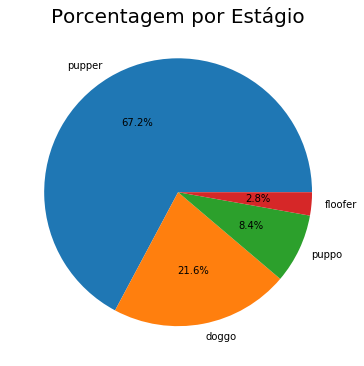

In [28]:
data = df.stage.value_counts()
labels = data.index

fig = plt.figure(figsize=(6,6))
ax = fig.subplots()

plt.axis('equal')
ax.set_title('Porcentagem por Estágio', size = 20)
ax.pie(data, labels = labels, autopct = '%1.1f%%')

plt.savefig('pizza_estágios.png')
plt.show()

##### - Com os dois gráficos de barra a seguir podemos concluir que o estágio 'pupper', apesar de ser o estágio com mais classificações, é o que tem menos 'favoritos' e 'retweets'. 

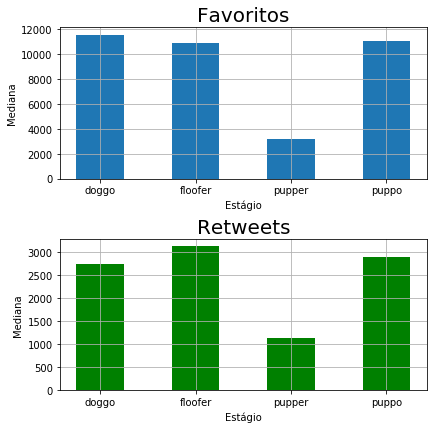

In [88]:
favorite = pd.Series(df.groupby('stage')['favorite_count'].median())
retweet = pd.Series(df.groupby('stage')['retweet_count'].median())

yf_axis = favorite.values
yr_axis = retweet.values
x_axis = favorite.index

fig = plt.figure(figsize=(6,6))

axf = fig.add_subplot(2,1,1, label = 'Favoritos')
axf.set_title ('Favoritos', size = 20)
axf.set_ylabel('Mediana')
axf.set_xlabel('Estágio')
axf.bar(x_axis, yf_axis, width = 0.5)
axf.grid(True)

axr = fig.add_subplot(2,1,2 ,label = 'Retweets')
axr.set_title ('Retweets', size = 20)
axr.set_ylabel('Mediana')
axr.set_xlabel('Estágio')
axr.bar(x_axis, yr_axis, color='g',width = 0.5)
axr.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.4, wspace=0.35)
plt.savefig('barras_mediana_retweets_favoritos.png', pad_inches = 40)
plt.show()


##### - Com os gráficos a seguir podemos ver as medianas de retweets e favoritos das raças caninas mais populares. 
##### - As raças 'Irish water spaniel', 'Saluki', ' flat-coated retriever', 'Bouvier des Flandres', 'black-and-tan coonhound' e 'Afghan hound' foram as raças que mais tiveram repercussão entre os seguidores do usuário WeHateDogs. Essas raças estão presentes tanto nos 10 mais favoritos quanto nos 10 mais retweets. 
##### - Analisando o gráfico 'Raças caninas com mais Reetweets (Mediana)'  vemos que a raça 'Afghan Hound' possui uma mediana muito maior que a raça subsequente, a 'Irish Water Spaniel', que possua vez, também apresenta uma diferença discrepante sobre a terceira raça.

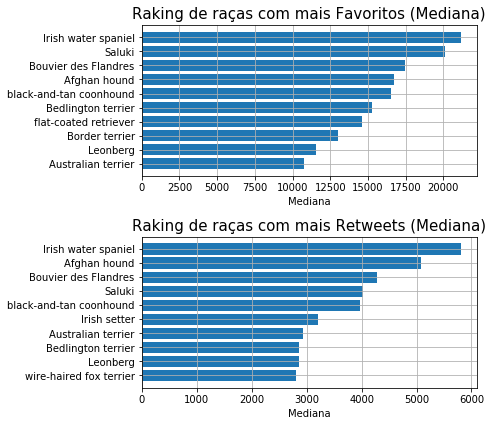

Raças caninas presentes nas duas listas:
Irish water spaniel
Saluki
Bouvier des Flandres
Afghan hound
black-and-tan coonhound
Bedlington terrier
Leonberg
Australian terrier


In [81]:
retweets_ranking = df.groupby('p1')['retweet_count'].median().sort_values(ascending = False)[:10]
favorites_raking = df.groupby('p1')['favorite_count'].median().sort_values(ascending = False)[:10]

xf_rank = favorites_raking.values
yf_rank = favorites_raking.index

xr_rank = retweets_ranking.values
yr_rank = retweets_ranking.index

plt.figure(figsize=(15,8))

pos = np.arange(len(favorites_raking))

fig = plt.figure(figsize=(6,6))

axf = fig.add_subplot(2,1,1)
axf.barh(pos, favorites_raking, align = 'center')
axf.set_yticks(pos)
axf.set_yticklabels(yf_rank)
axf.set_xlabel('Mediana')
axf.set_title('Raking de raças com mais Favoritos (Mediana)', size = 15)
axf.invert_yaxis()
axf.grid(True)

axr = fig.add_subplot(2,1,2)
axr.barh(pos, retweets_ranking, align = 'center')
axr.set_yticks(pos)
axr.set_yticklabels(yr_rank)
axr.set_xlabel('Mediana')
axr.set_title('Raking de raças com mais Retweets (Mediana)', size = 15)
axr.invert_yaxis()
axr.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4, wspace=0.35)

plt.savefig('barras_mediana_raças.png', pad_inches = 40)
plt.show()

lista = []
for raca in yf_rank:
    if raca in yr_rank:
        lista.append(raca)
print('Raças caninas presentes nas duas listas:')
for r in lista:
    print(r)

##### - O gráfico de dispersão a seguir mostra a distribuição dos Retweets e dos Favoritos de cada tweet do usuário. 

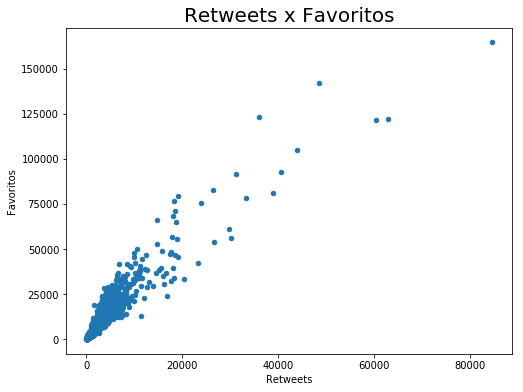

In [82]:
axs = df.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter', figsize=(8,6))
axs.set_title('Retweets x Favoritos', size = 20)
axs.set_xlabel("Retweets")
axs.set_ylabel("Favoritos")

plt.savefig('dispersão_retweets_favoritos.png')

##### -  A seguir podemos ver a média das notas agrupadas por estágio

In [55]:
numerator = df.groupby('stage').rating_numerator.mean()
pd.DataFrame(data = numerator)

,rating_numerator
stage,
doggo,12.076923
floofer,12.000000
pupper,11.263889
puppo,12.100000
